In [27]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train=pd.read_csv("Dataset/bigmart_train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
train.shape

(8523, 12)

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
print(train['Item_Fat_Content'].unique())
print(train['Outlet_Establishment_Year'].unique())
print(train['Outlet_Size'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
['Medium' nan 'High' 'Small']


In [13]:
train['Outlet_Age']=2018-train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [15]:
#Check numerical data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [18]:
#check categorical data
print('Item_Fat_Content:')
print(train['Item_Fat_Content'].value_counts())
print('\nOutlet_Size:')
print(train['Outlet_Size'].value_counts())

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [24]:
train['Outlet_Size'].mode()[0]

'Medium'

In [25]:
#Fix missing values
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

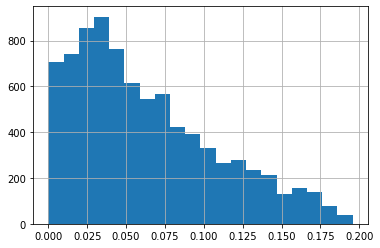

In [36]:
#check for outliers and remove them
train['Item_Visibility'].hist(bins=20)

In [31]:
Q1=train['Item_Visibility'].quantile(0.25)
Q3=train['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1
filt_train=train.query('(@Q1-1.5*@IQR)<=Item_Visibility <=(@Q3 +1.5 *@IQR)')

In [32]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,9
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,31
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,33
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,16
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,11


In [33]:
filt_train.shape,train.shape

((8379, 13), (8523, 13))

In [34]:
train=filt_train
train.shape

(8379, 13)

In [38]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'],[0.000,0.065,0.13,0.2],
              labels=['Low Viz','Viz','High Viz'])

C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [40]:
train['Item_Visibility_bins']=train['Item_Visibility_bins'].replace(np.nan,'Low Viz', regex=True)

C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['Low Fat','LF'],'Low Fat')

C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,Low Viz


In [44]:
#encoding all categoraical data to numerical
le=LabelEncoder()

In [45]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [46]:
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])
train['Item_Visibility_bins']=le.fit_transform(train['Item_Visibility_bins'])
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])

C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [47]:
dummy=pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [48]:
train=pd.concat([train,dummy],axis=1)

In [49]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [50]:
train=train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [51]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [52]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,20,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,31,1,0,1,0,0


In [53]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train.Item_Outlet_Sales

In [62]:
#fix the test data set
test=pd.read_csv('Dataset/bigmart_test.csv')

In [63]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [64]:
test['Outlet_Age']=2018-test['Outlet_Establishment_Year']
test['Item_Visibility_bins']=pd.cut(train['Item_Visibility'],[0.000,0.065,0.13,0.2],
              labels=['Low Viz','Viz','High Viz'])

In [65]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [66]:
test['Item_Visibility_bins']=test['Item_Visibility_bins'].fillna('Low Viz')

In [67]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])
test['Item_Visibility_bins']=le.fit_transform(test['Item_Visibility_bins'])
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])


In [68]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Visibility_bins
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,19,1
1,FDW14,8.300000,4,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,11,1
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store,20,1
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,11,1
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,33,1


In [69]:
dummy=pd.get_dummies(test['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [70]:
test=pd.concat([test,dummy],axis=1)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,19,1,0,1,0,0
1,FDW14,8.300000,4,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,11,1,0,1,0,0
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store,20,1,1,0,0,0
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,11,1,0,1,0,0
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,33,1,0,0,0,1


In [71]:
X_test= test.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [73]:
X.columns,X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [88]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [89]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print(lin.intercept_)
print(lin.coef_)

-193.40594302880254
[    3.32820985    26.01366458  -193.57463691    15.96723032
    16.76915553     7.9492351     -2.30274404    17.50198205
 -1753.81236453   219.13538259  -122.45808569  1657.13506762]


In [91]:
print(sqrt(mean_squared_error(y_train,lin.predict(x_train))))
print(sqrt(mean_squared_error(y_test,lin.predict(x_test))))

1139.5258655721946
1118.4200156058166


In [85]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,ridgereg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(x_test,y_test)))

1139.5265729685175
1118.3636046670542
R2 Value/Coefficient of determination:0.5486563374937858


In [86]:
from sklearn.linear_model import Lasso
lassoreg=Ridge(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,lassoreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(x_test,y_test)))

1139.5265729685175
1118.3636046670542
R2 Value/Coefficient of determination:0.5486563374937858


In [87]:
from sklearn.linear_model import ElasticNet
elasticreg=Ridge(alpha=0.001,normalize=True)
elasticreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,elasticreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(elasticreg.score(x_test,y_test)))

1139.5265729685175
1118.3636046670542
R2 Value/Coefficient of determination:0.5486563374937858
